This is the notebook template for ISLP Charpter 5 applied practice.
Reference:
* https://www.kaggle.com/code/suugaku/islr-chapter-5-applied-exercises-python

In [2]:
def importlib():
    global pd, np, sns, plt, smf, sm, ProbPlot, train_test_split
    global LinearRegression, LogisticRegression, accuracy_score, classification_report, confusion_matrix
    global LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,KNeighborsClassifier,GaussianNB
    global Pipeline,cross_val_score, LeaveOneOut, KFold,OneHotEncoder, PolynomialFeatures,ColumnTransformer,resample
    # import necessary libraries
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    from statsmodels.graphics.gofplots import ProbPlot
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression, LinearRegression
    from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #linear discriminant analysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #quadratic discriminant analysis
    from sklearn.neighbors import KNeighborsClassifier #K nearest neighbours (KNN)
    from sklearn.naive_bayes import GaussianNB
    from sklearn.pipeline import Pipeline
# Import classes from scikit-learn for logistic regression, least squares linear regression
# Import OneHotEncoder and PolynomialFeatures for data pre-processing
# Import Pipeline, ColumnTransformer to encapsulate pre-processing heterogenous data and fitting
# into a single estimator
# Import train_test_split, cross_val_score, LeaveOneOut, KFold for model validation
# Import resample for bootstrapping
    from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
    from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.utils import resample

    
    print('done')

importlib()

done


## 5.5.
In Chapter 4, we used logistic regression to predict the probability of `default` using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

(a) Fit a logistic regression model that uses `income` and `balance` to predict `default`.

In [2]:
np.random.seed(1)

In [4]:
df = pd.read_csv('Default.csv')
df.head(2)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700


In [8]:
df['default_yes'] = (df['default'] == 'Yes').astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      10000 non-null  object 
 1   student      10000 non-null  object 
 2   balance      10000 non-null  float64
 3   income       10000 non-null  float64
 4   default_yes  10000 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


We are looking for LogisticRegression without regularization. In sklearn this is not implemented, but we can use l2 regularization and set C, the inverese strenght, to a very high number, effectively removing the regularization. We also compare the coefficients to the ones obtained from statsmodel LogisticRegression which has no regularization, and we verify that the coefficient estimates match.

Another parameter we have to consider is the tolerance. In this case, the default 1e-4 is not enough to reach convergence, so we increased it until it did.

Below we that the coefficients obtained with sklearn agree with those from statsmodels.

In [10]:
x_cols = ['income','balance']
y_col = ['default_yes']
X = df[x_cols]
y = df[y_col]

In [16]:
model1 = LogisticRegression(C=1e6, tol = 1e-6)
res1 = model1.fit(X,y)

# print summary
# Access the coefficients
coefficients = model1.coef_
intercept = model1.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)



Coefficients: [[2.08089921e-05 5.64710291e-03]]
Intercept: [-11.54046839]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
model2 = smf.logit(formula = 'default_yes ~ income + balance', data = df)
res2 = model2.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 May 2024   Pseudo R-squ.:                  0.4594
Time:                        13:31:01   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training observations.

iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the `default` category if the posterior probability is greater than 0.5.

iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.head(2))
print(y_train.head(2))

            income      balance
5341  33832.489629  1024.326377
7483  39914.919048   520.654613
      default_yes
5341            0
7483            0


In [23]:
y_test.head(2)

,default_yes
9203,0
7827,1


In [26]:
res10 = model1.fit(X_train, y_train)
y_pred = res10.predict(X_test)
conf_m = confusion_matrix(y_test,y_pred)
print(conf_m)

[[2411    8]
 [  51   30]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

,0,1
0,2411,8
1,51,30


(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [28]:
## Create 3 different splits
# First split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=100)

# Third split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=2022)


In [29]:
y_test1.head(2)

,default_yes
6252,0
4684,0


In [31]:
y_test2.head(2)

,default_yes
8018,0
9225,0


In [32]:
y_test3.head(2)

,default_yes
6487,0
8785,0


In [33]:
res11 = model1.fit(X_train1, y_train1)
y_pred = res11.predict(X_test1)
mat = pd.DataFrame(confusion_matrix(y_test1,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,1931,0
1,69,0


In [34]:
res12 = model1.fit(X_train2, y_train2)
y_pred = res12.predict(X_test2)
mat = pd.DataFrame(confusion_matrix(y_test2,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,1935,0
1,65,0


In [35]:
res13 = model1.fit(X_train3, y_train3)
y_pred = res12.predict(X_test3)
mat = pd.DataFrame(confusion_matrix(y_test3,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,1938,0
1,62,0


### A little bit weired results above, try out another method
### It is right!

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 42)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.034499999999999975

In [52]:
y_pred = clf.predict(X_test)
mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

,0,1
0,1931,0
1,69,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 100)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03249999999999997

In [54]:
y_pred = clf.predict(X_test)
mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

,0,1
0,1935,0
1,65,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 2022)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.031000000000000028

In [56]:
mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

,0,1
0,1938,0
1,62,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25, random_state = 456)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03200000000000003

In [58]:
y_pred = clf.predict(X_test)
mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

,0,1
0,2420,1
1,79,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25, random_state = 789)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.034399999999999986

In [61]:
y_pred = clf.predict(X_test)
mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

,0,1
0,2394,10
1,76,20


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25, random_state = 314159)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.031200000000000006

In [63]:
y_pred = clf.predict(X_test)
mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["0", "1"], index = ["0", "1"])
mat

,0,1
0,2422,0
1,78,0


In [65]:
(df["default"] != "No").mean()

0.0333

#### Comment:
Using three different 75-25 splits of the data, our validation set error remained fairly consistent. The average error between this part and Part 2 was 0.0315, and errors were all within about 20% of each other. We also note, however, that these test errors are all fairly close to the error one would achieve with a naive strategy of just saying that nobody will default. The average of the test errors is only about 5% less than the error from using the naive strategy.

(d) Now consider a logistic regression model that predicts the probability of `default` using `income, balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.

In [70]:
np.random.seed(312)
with_student = {}
without_student = {}

# Create two classifier pipelines
# with_student takes the student variable and encodes it using one hot encoding, passes through income, balance
# without_student drops the student variable and only passes through income and balance
categorical_features = ["student"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["income", "balance"]
with_student_preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
with_student_clf = Pipeline([("preprocessor", with_student_preprocessor), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])
without_student_preprocessor = ColumnTransformer([("num", "passthrough", numerical_features)])
without_student_clf = Pipeline([("preprocessor", without_student_preprocessor), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])

In [73]:
# Loop through 50 train-test splits to compute average difference in error rate
for i in range(50):
    # Split the data in to training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df, df["default"], test_size = 0.25)
    # Fit classifier which includes student variable and compute validation set error
    with_student_clf.fit(X_train, y_train);
    with_student[i] = 1 - with_student_clf.score(X_test, y_test);
    # Fit classifier which excludes student variable and compute validation set error
    without_student_clf.fit(X_train, y_train);
    without_student[i] = 1 - without_student_clf.score(X_test, y_test);
errors = pd.DataFrame({"with_student": with_student, "without_student": without_student})
errors["difference"] = errors["with_student"] - errors["without_student"]
errors

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_m

,with_student,without_student,difference
0,0.0316,0.0316,0.0000
1,0.0336,0.0316,0.0020
2,0.0308,0.0308,0.0000
3,0.0324,0.0256,0.0068
4,0.0268,0.0264,0.0004
5,0.0332,0.0332,0.0000
6,0.0328,0.0284,0.0044
7,0.0348,0.0304,0.0044
8,0.0344,0.0280,0.0064
9,0.0300,0.0272,0.0028


In [74]:
errors["difference"].mean()

0.002904000000000009

Looping through 50 train-test splits and comparing the error rates between the logistic regression model predicting default using income, balance, and student and the logistic regression model predicting default using just income and balance for each split, we see that, on average, including a dummy variable for student does not lead to a reduction in the test error rate. In fact, on average it resulted in a very slight increase in the test error rate.

### 5.6.
We continue to consider the use of a logistic regression model to predict the probability of `default` using `income` and `balance` on the `Default` data set. In particular, we will now compute estimates for the standard errors of the `income` and `balance` logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the `sm.GLM()` function. Do not forget to set a random seed before beginning your analysis.

(a) Using the `summarize()` and `sm.GLM()` functions, determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model that uses both predictors.

In [81]:
# Using the Logit class from StatsModels
# First encode response numerically
y = (df["default"] == "Yes").astype(int)
X = sm.add_constant(df[["income", "balance"]])
mod = sm.Logit(y,X)
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 May 2024   Pseudo R-squ.:                  0.4594
Time:                        14:39:46   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [82]:
res.bse["income"]

4.9852454617530595e-06

In [83]:
res.bse["balance"]

0.00022738138476844987

In [86]:
# use sm.GLM()
#using generalized linear models with statsmodel
#see the wikipedia reference to understand why family is binomial
mod1 = smf.glm(formula='default ~ income + balance', data=df, family=sm.families.Binomial()).fit() #create & fit model
print(mod1.summary()) #show results

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['default[No]', 'default[Yes]']   No. Observations:                10000
Model:                                         GLM   Df Residuals:                     9997
Model Family:                             Binomial   Df Model:                            2
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -789.48
Date:                             Mon, 06 May 2024   Deviance:                       1579.0
Time:                                     14:51:48   Pearson chi2:                 6.95e+03
No. Iterations:                                  9   Pseudo R-squ. (CS):             0.1256
Covariance Type:                         nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-

(b) Write a function, `boot_fn()`, that takes as input the `Default` data set as well as an index of the observations, and that outputs the coefficient estimates for `income` and `balance` in the multiple logistic regression model.

In [98]:
def boot_fn(df,rd_index):
    '''
    Sampling observations from a dataframe, and return the logistic regression coef

    Parameters
    ------------
    df : pandas dataframe(Data to be resampled)

    rd_index: random generated array (size < df size)

    Returns
    ------------
    coefs : coefs from logistic regression
    '''
    #assign default size if non-specified

    #create random integers to use as indices for bootstrap sample based on original data
    bootSample = df.iloc[rd_index]
    mod = smf.glm(formula='default ~ income + balance', data=df, family=sm.families.Binomial()).fit()
    coef_income = mod.params[1]
    coef_balance = mod.params[2]
    return [coef_income, coef_balance]
    
    

In [ ]:
# another option to get the random index(seems wrong)
#bootSample_size = 500
#bootSample_i = np.random.rand(bootSample_size)
#bootSample_i

In [111]:
#bootSample_i = (np.random.rand(bootSample_size)*bootSample_size).astype(int)
#bootSample_i

In [109]:
#bootSample_arr = np.array(bootSample_i)
#bootSample_arr

(c) Following the bootstrap example in the lab, use your `boot_fn()` function to estimate the standard errors of the logistic regression coefficients for `income` and `balance`.

In [116]:
# one option to get the random idx
seed = 0
rng = np.random.default_rng(seed) 
#running model for bootstrapped samples

bootSample_size = len(df)
idx = rng.choice(df.index,
                         bootSample_size,
                         replace=True)



In [117]:
coefficients = [] #variable initialization
n = 100 #number of bootstrapped samples

for i in range(0,n):
    
    coef_i = boot_fn(df,idx) #determining coefficients for specific bootstrapped sample
    coefficients.append(coef_i) #saving coefficients value

print(pd.DataFrame(coefficients).mean()) #print average of coefficients

0   -0.000021
1   -0.005647
dtype: float64


In [118]:
print(pd.DataFrame(coefficients).std()) #print s.e. of coefficients

0    2.724160e-20
1    5.230388e-18
dtype: float64


### Seems the bootstrap std is rather small, try another code from
https://botlnec.github.io/islp/sols/chapter5/exercise6/
### !!!seems boot_se() is not the same as df.std() (see labs for correction)



In [124]:
def boot_fn(default):
    mod1 = smf.glm(formula='default ~ income + balance', data=df, family=sm.families.Binomial()).fit()
    coef_income = mod1.params[1]
    coef_balance = mod1.params[2]
    return [coef_income, coef_balance]

In [125]:
#bootstrap function
def boot(X, bootSample_size=None):
    '''
    Sampling observations from a dataframe

    Parameters
    ------------
    X : pandas dataframe
        Data to be resampled

    bootSample_size: int, optional
        Dimension of the bootstrapped samples

    Returns
    ------------
    bootSample_X : pandas dataframe
        Resampled data

    Examples
    ----------
    To resample data from the X dataframe:
        >> boot(X)
    The resampled data will have length equal to len(X).

    To resample data from the X dataframe in order to have length 5:
        >> boot(X,5)

    References
    ------------
    http://nbviewer.jupyter.org/gist/aflaxman/6871948

    '''

    #assign default size if non-specified
    if bootSample_size == None:
        bootSample_size = len(X)

    #create random integers to use as indices for bootstrap sample based on original data
    bootSample_i = (np.random.rand(bootSample_size)*len(X)).astype(int)
    bootSample_i = np.array(bootSample_i)
    bootSample_X = X.iloc[bootSample_i]

    return bootSample_X

In [126]:
#running model for bootstrapped samples
coefficients = [] #variable initialization
n = 100 #number of bootstrapped samples

for i in range(0,n):
    coef_i = boot_fn(boot(df)) #determining coefficients for specific bootstrapped sample
    coefficients.append(coef_i) #saving coefficients value

print(pd.DataFrame(coefficients).mean()) #print average of coefficients

0   -0.000021
1   -0.005647
dtype: float64


In [127]:
print(pd.DataFrame(coefficients).std())

0    2.724160e-20
1    5.230388e-18
dtype: float64


* **Standard Error (boot_se)**: The standard error of a coefficient estimate provides a measure of the uncertainty or variability in the estimated coefficient due to sampling variability. In bootstrapping, the standard error is typically estimated by repeatedly resampling the dataset with replacement, fitting the model to each resampled dataset, and calculating the standard deviation of the coefficient estimates across the bootstrap samples. This captures the variability in coefficient estimates that arises from sampling variation in the data.
* **Standard Deviation (df.std)**: On the other hand, the standard deviation of the coefficients (as calculated from the dataframe df) represents the variability of the coefficients across different observations in the dataset. It measures the spread of the coefficients around their mean value within the original dataset.

* **These two measures capture different types of variability**:

* The standard error captures the variability in coefficient estimates due to sampling variability.
* The standard deviation captures the variability in coefficient estimates across different observations in the dataset.

### Corrected code below:

In [130]:
def boot_fn(default):
    mod1 = smf.glm(formula='default ~ income + balance', data=df, family=sm.families.Binomial()).fit()
    coef_income = mod1.params[1]
    coef_balance = mod1.params[2]
    std_income = mod1.bse[1]
    std_balance = mod1.bse[2]
    return [coef_income, coef_balance,std_income,std_balance]

In [131]:
coefficients = [] #variable initialization
n = 100 #number of bootstrapped samples

for i in range(0,n):
    coef_i = boot_fn(boot(df)) #determining coefficients for specific bootstrapped sample
    coefficients.append(coef_i) #saving coefficients value

#print average of coefficients and se for coffcients
# 0: income_coef
# 1: balance_coef
# 3: income_std
# 4: balance_std
print(pd.DataFrame(coefficients).mean()) 

0   -0.000021
1   -0.005647
2    0.000005
3    0.000227
dtype: float64


### use sklearn 
#### Question: will each randomly selecting samples to be the same set each time?
**Answer**:
No, each time you perform bootstrap resampling with a random seed, the randomly selected samples will not be the same set each time. 

Although setting a random seed ensures reproducibility by making the random number generation deterministic, the bootstrapping process still involves random sampling with replacement. This means that even though the same seed is used, the resampling process will result in different bootstrap samples each time due to the random selection of observations.

Here's a breakdown of how it works:

1. Setting the random seed ensures that the random number generator produces the same sequence of pseudo-random numbers each time.
2. However, when you perform bootstrap resampling, you're randomly selecting samples with replacement from your original dataset.
3. Since the random selection is based on the sequence of pseudo-random numbers generated by the random number generator, each bootstrap sample will be different, even though the same seed is used.

So, while the random seed ensures that the resampling process is reproducible, it does not mean that the same set of observations will be selected each time. Instead, it ensures that the random sampling process follows the same sequence of pseudo-random numbers, resulting in consistent and reproducible results across different runs of the code.

In [134]:
## An example ##

import numpy as np

# Set the random seed for reproducibility
np.random.seed(17)

# Sample data
original_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Number of bootstrap iterations
num_bootstrap_iterations = 1000

# Bootstrap resampling
bootstrap_samples = []
for _ in range(num_bootstrap_iterations):
    # Generate random indices with replacement
    indices = np.random.choice(original_data, size=len(original_data), replace=True)
    # Get the bootstrap sample
    bootstrap_sample = original_data[indices-1]
    # Append the bootstrap sample to the list
    bootstrap_samples.append(bootstrap_sample)

# Conduct analysis on the resampled data (e.g., compute statistics)
# For example, calculate the mean of each bootstrap sample
bootstrap_means = [sample.mean() for sample in bootstrap_samples]

# Compute the mean and standard error of the bootstrap means
mean_bootstrap_means = np.mean(bootstrap_means)
std_error_bootstrap_means = np.std(bootstrap_means, ddof=1) / np.sqrt(num_bootstrap_iterations)

# Print the results
print("Mean of bootstrap means:", mean_bootstrap_means)
print("Standard error of bootstrap means:", std_error_bootstrap_means)


Mean of bootstrap means: 5.5459
Standard error of bootstrap means: 0.02798045918308161


(d) Comment on the estimated standard errors obtained using the `sm.GLM()` function and using the bootstrap.

#### **It is really important to understand the diff between boot_se and df(coef).std!! see notes above**

## 5.7.
In Sections 5.1.2 and 5.1.3, we saw that the `cross_validate()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just `sm.GLM()` and the `predict()` method of the fitted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the `Weekly` data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

(a) Fit a logistic regression model that predicts `Direction` using `Lag1 and Lag2`.

In [4]:
df = pd.read_csv('Weekly.csv')
df.head(2)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down


In [7]:
#x_cols = ['Lag1','Lag2']
#X = df[x_cols]
#y = df['Direction']
res = smf.glm(formula='Direction ~ Lag1 + Lag2', data=df, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1086
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -744.11
Date:                                  Tue, 07 May 2024   Deviance:                       1488.2
Time:                                          13:48:53   Pearson chi2:                 1.09e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.007303
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2212      0.061     -3.599      0.000      -0.342      -0.101
Lag1           0.0387      0.026      1.477      0.140      -0.013       0.090
Lag2          -0.0602      0.027     -2.270      0.023      -0.112      -0.008
==============================================================================
"""

(b) Fit a logistic regression model that predicts `Direction` using `Lag1 and Lag2` using all but the first observation.

In [10]:
df1 = df.copy()
df1 = df.iloc[1:,:]
print(df.shape,df1.shape)


(1089, 9) (1088, 9)


In [11]:
res1 = smf.glm(formula = 'Direction ~ Lag1 + Lag2', data = df1, family = sm.families.Binomial()).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1088
Model:                                              GLM   Df Residuals:                     1085
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.26
Date:                                  Tue, 07 May 2024   Deviance:                       1486.5
Time:                                          13:52:53   Pearson chi2:                 1.09e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.007373
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2232      0.061     -3.630      0.000      -0.344      -0.103
Lag1           0.0384      0.026      1.466      0.143      -0.013       0.090
Lag2          -0.0608      0.027     -2.291      0.022      -0.113      -0.009
==============================================================================
"""

(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(Direction = "Up"|Lag1, Lag2) > 0.5$. Was this observation correctly classified?

In [22]:
x_test = df[['Lag1', 'Lag2']].iloc[1,:]
p_pred = res1.predict(x_test)
p_pred

1    0.429652
dtype: float64

In [23]:
y_pred = 'Up' if (p_pred >= 0.5) else 'Down'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### !!!**warning**: 
The error message "The truth value of a Series is ambiguous" typically occurs when you're trying to use a boolean condition (e.g., p_pred >= 0.5) directly on a pandas Series object. This happens because pandas Series objects support element-wise operations, but they don't support direct boolean evaluation for the entire Series.

In [27]:
p_pred = (p_pred >= 0.5).astype(int)
p_pred

1    0
dtype: int64

In [32]:
p_pred == 1

1    False
dtype: bool

In [36]:
y_pred = p_pred.apply(lambda x: 'Up' if x == 1 else 'Down')
y_pred

1    Down
dtype: object

(d) Write a for loop from $i=1$ to $i=n$,where $n$ is the number of observations in the data set, that performs each of the following steps:

i. Fit a logistic regression model using all but the ith observation to predict `Direction` using `Lag1` and `Lag2`.

ii. Compute the posterior probability of the market moving up for the $i$th observation.

iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.

iv. Determine whether or not an error was made in predicting the direction for the $i$th observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [43]:
df[['Direction']].iloc[i,:] == 'Down'

Direction    True
Name: 0, dtype: bool

In [70]:
error = []
for i in range(df.shape[0]):
    df1 = df.drop(index =i)
    res = smf.glm(formula = 'Direction ~ Lag1 + Lag2', data= df1, family = sm.families.Binomial()).fit()
    p_pred = res.predict(df[['Lag1', 'Lag2']].iloc[i,:])
    y_pred = p_pred.apply(lambda x : 'Up' if x > 0.5 else 'Down')
    error.append(y_pred.values != df[['Direction']].iloc[i,:].values)



In [68]:
## this is the test block
error1 = []
for i in range(3):
    df1 = df.drop(index =i)
    res = smf.glm(formula = 'Direction ~ Lag1 + Lag2', data= df1, family = sm.families.Binomial()).fit()
    p_pred = res.predict(df[['Lag1', 'Lag2']].iloc[i,:])
    print(p_pred)
    y_pred = p_pred.apply(lambda x : 'Up' if x > 0.5 else 'Down')
    print(y_pred.values)
    error1.append(y_pred.values != df[['Direction']].iloc[i,:].values)
 


0    0.428608
dtype: float64
['Down']
1    0.429661
dtype: float64
['Down']
2    0.425355
dtype: float64
['Down']


In [69]:
## this is the test block
error1

[array([False]), array([False]), array([ True])]

In [61]:
## this is the test block
y_pred.values

array(['Down'], dtype=object)

In [71]:
## this is the test block
y_pred =  'Up' if p_pred.values > 0.5 else 'Down'
y_pred

'Down'

(e) Take the average of the $n$ numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [72]:
pd.Series(error).astype(int).mean()

0.5500459136822773

## 5.8.
We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

In [73]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)


In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.


n = number of observations = 100
p = number of predictors

$$
y = x + 2x^{2} + \epsilon
$$

(b) Create a scatterplot of X against Y . Comment on what you find.

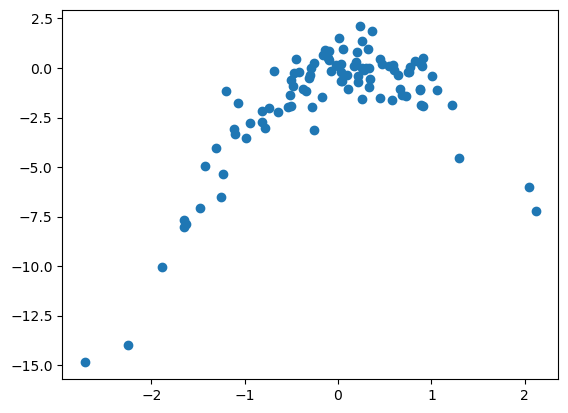

In [74]:
plt.scatter(x,y)

(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
$$
i. Y = β_0 + β_1X + ε
$$
$$
ii. Y =β_0 +β_1X+β_2X^2 +ε
$$
$$
iii. Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε
$$
$$
iv. Y =β_0 +β_1X+β_2X^2 +β_3X^3 +β_4X^4 +ε
$$

Note you may find it helpful to use the `data.frame()` function to create a single data set containing both X and Y .

In [82]:
import random
random.seed(2)
df1 = pd.DataFrame({'y':y, 'x':x})
df1.head()

,y,x
0,-0.544554,0.345584
1,0.333950,0.821618
2,-0.013532,0.330437
3,-4.030442,-1.303157
4,0.484861,0.905356


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_scores = []
mae_scores = []
for i in range(df1.shape[0]):
    df11 = df1.drop(index = i)
    res = smf.ols(formula = 'y ~ x', data = df11).fit()

    x_test = df1[['x']].iloc[i,:]
    y_test = df1[['y']].iloc[i,:]
    # Predict on test data
    y_pred = res.predict(x_test)

    # Compute MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
# Mean Squared Error (MSE)/Mean Absolute Error (MAE):
avg_mse = pd.Series(mse_scores).mean()
avg_mae = pd.Series(mae_scores).mean()
print('mse_scores:{}, mae_scores:{}'.format(avg_mse,avg_mae))    

mse_scores:6.633029839181984, mae_scores:1.721636050669832


In [87]:
df2 = pd.DataFrame({'y':y, 'x':x,'x2':x**2})
df2.head()

,y,x,x2
0,-0.544554,0.345584,0.119428
1,0.333950,0.821618,0.675056
2,-0.013532,0.330437,0.109189
3,-4.030442,-1.303157,1.698219
4,0.484861,0.905356,0.819669


In [89]:
mse_scores = []
mae_scores = []
for i in range(df2.shape[0]):
    df21 = df2.drop(index = i)
    res = smf.ols(formula = 'y ~ x + x2', data = df21).fit()

    x_test = df2[['x','x2']].iloc[i,:]
    y_test = df2[['y']].iloc[i,:]
    # Predict on test data
    y_pred = res.predict(x_test)

    # Compute MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
# Mean Squared Error (MSE)/Mean Absolute Error (MAE):
avg_mse = pd.Series(mse_scores).mean()
avg_mae = pd.Series(mae_scores).mean()
print('mse_scores:{}, mae_scores:{}'.format(avg_mse,avg_mae)) 

mse_scores:1.1229368563419688, mae_scores:0.8088369470253669


In [78]:
df3 = pd.DataFrame({'y':y, 'x':x,'x2':x**2,'x3':x**3})
df3.head()

,y,x,x2,x3
0,-0.544554,0.345584,0.119428,0.041273
1,0.333950,0.821618,0.675056,0.554639
2,-0.013532,0.330437,0.109189,0.036080
3,-4.030442,-1.303157,1.698219,-2.213046
4,0.484861,0.905356,0.819669,0.742092


In [90]:
mse_scores = []
mae_scores = []
for i in range(df3.shape[0]):
    df31 = df3.drop(index = i)
    res = smf.ols(formula = 'y ~ x + x2+x3', data = df31).fit()

    x_test = df3[['x','x2','x3']].iloc[i,:]
    y_test = df3[['y']].iloc[i,:]
    # Predict on test data
    y_pred = res.predict(x_test)

    # Compute MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
# Mean Squared Error (MSE)/Mean Absolute Error (MAE):
avg_mse = pd.Series(mse_scores).mean()
avg_mae = pd.Series(mae_scores).mean()
print('mse_scores:{}, mae_scores:{}'.format(avg_mse,avg_mae)) 

mse_scores:1.301796548935887, mae_scores:0.8401313730476941


In [79]:
df4 = pd.DataFrame({'y':y, 'x':x,'x2':x**2,'x3':x**3,'x4':x**4})
df4.head()

,y,x,x2,x3,x4
0,-0.544554,0.345584,0.119428,0.041273,0.014263
1,0.333950,0.821618,0.675056,0.554639,0.455701
2,-0.013532,0.330437,0.109189,0.036080,0.011922
3,-4.030442,-1.303157,1.698219,-2.213046,2.883947
4,0.484861,0.905356,0.819669,0.742092,0.671858


In [91]:
mse_scores = []
mae_scores = []
for i in range(df4.shape[0]):
    df41 = df4.drop(index = i)
    res = smf.ols(formula = 'y ~ x + x2+x3+x4', data = df41).fit()

    x_test = df4[['x','x2','x3','x4']].iloc[i,:]
    y_test = df4[['y']].iloc[i,:]
    # Predict on test data
    y_pred = res.predict(x_test)

    # Compute MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
# Mean Squared Error (MSE)/Mean Absolute Error (MAE):
avg_mse = pd.Series(mse_scores).mean()
avg_mae = pd.Series(mae_scores).mean()
print('mse_scores:{}, mae_scores:{}'.format(avg_mse,avg_mae)) 

mse_scores:1.332394269417932, mae_scores:0.8342976582166507


(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

#### Answer:
The results are exactly the same because we only remove one observation from the training set. Thus, there is no random effect resulting from the observations used for the test set. LOOCV will always be the same, no matter the random seed.



(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

with x2, yes

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [92]:
res = smf.ols(formula = 'y ~ x ', data = df4).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.04e-09
Time:                        15:13:54   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4650      0.247     -5.937      0.000      -1.955      -0.975
x              1.9494      0.289      6.752      0.000       1.376       2.522
==============================================================================
Omnibus:                       52.788   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.089
Skew:                          -1.953   Prob(JB):                     4.22e-33
Kurtosis:                       7.530   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
res = smf.ols(formula = 'y ~ x + x2', data = df4).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     379.5
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.36e-46
Time:                        15:14:05   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0728      0.119     -0.611      0.543      -0.309       0.164
x              0.9663      0.126      7.647      0.000       0.715       1.217
x2            -2.0047      0.091    -22.072      0.000      -2.185      -1.824
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
res = smf.ols(formula = 'y ~ x + x2+x3', data = df4).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     253.8
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.70e-45
Time:                        15:14:17   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0572      0.120     -0.477      0.635      -0.295       0.181
x              1.1146      0.187      5.945      0.000       0.742       1.487
x2            -2.0471      0.099    -20.673      0.000      -2.244      -1.851
x3            -0.0643      0.060     -1.070      0.287      -0.184       0.055
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.392
Skew:                           0.052   Prob(JB):                        0.822
Kurtosis:                       3.289   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
res = smf.ols(formula = 'y ~ x + x2+x3+x4', data = df4).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     200.2
Date:                Tue, 07 May 2024   Prob (F-statistic):           2.22e-45
Time:                        15:14:29   Log-Likelihood:                -137.74
No. Observations:                 100   AIC:                             285.5
Df Residuals:                      95   BIC:                             298.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1008      0.136      0.743      0.460      -0.169       0.370
x              0.9050      0.205      4.423      0.000       0.499       1.311
x2            -2.5059      0.221    -11.336      0.000      -2.945      -2.067
x3             0.0338      0.073      0.466      0.642      -0.110       0.178
x4             0.1042      0.045      2.309      0.023       0.015       0.194
==============================================================================
Omnibus:                        2.476   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.097
Skew:                           0.118   Prob(JB):                        0.351
Kurtosis:                       3.669   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.9.
We will now consider the `Boston` housing data set, from the ISLP library.

(a) Based on this data set, provide an estimate for the population mean of `medv`. Call this estimate $\hat{μ}$.

In [96]:
df = pd.read_csv('Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [98]:
medv = df['medv']
mu_hat = medv.mean()
mu_hat

22.532806324110677

(b) Provide an estimate of the standard error of $\hat{μ}$. Interpret this result.

$Hint$: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [99]:
se_mu = medv.std()/np.sqrt(len(medv))
se_mu

0.4088611474975351

(c) Now estimate the standard error of $\hat{μ}$ using the bootstrap. How does this compare to your answer from (b)?

In [106]:
# Set the random seed for reproducibility
np.random.seed(17)

# Sample data
original_data = medv

# Number of bootstrap iterations
num_bootstrap_iterations = 1000

# Bootstrap resampling
bootstrap_samples = []
for _ in range(num_bootstrap_iterations):
    # Generate random indices with replacement
    sample = np.random.choice(original_data, size=len(original_data), replace=True)
    # Get the bootstrap sample
    bootstrap_sample = sample
    # Append the bootstrap sample to the list
    bootstrap_samples.append(bootstrap_sample)

# Conduct analysis on the resampled data (e.g., compute statistics)
# For example, calculate the mean of each bootstrap sample
bootstrap_means = [sample.mean() for sample in bootstrap_samples]
bootstrap_std = [sample.std() for sample in bootstrap_samples]

# Compute the mean and standard error of the bootstrap means
mean_bootstrap_means = np.mean(bootstrap_means)
std_error_bootstrap_means = np.std(bootstrap_means,ddof = 1)

# Print the results
print("Mean of bootstrap means:", mean_bootstrap_means)
print("Standard error of bootstrap means:", std_error_bootstrap_means)

Mean of bootstrap means: 22.52969130434783
Standard error of bootstrap means: 0.405526665018759


In [107]:
np.random.seed(312)
n_bootstraps = 10000
means = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(medv)
    means[i] = sample.mean()
print("Bootstrap estimate of mean: ", means.mean())
print("Bootstrap estimate of std. error: ", means.std(ddof = 1))
##Notes: ddof=1: This parameter stands for "Delta Degrees of Freedom" and is set to 1, 
## indicating that Bessel's correction should be applied.

Bootstrap estimate of mean:  22.529328873517787
Bootstrap estimate of std. error:  0.4096425744290966


(d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained by using `Boston['medv'].std()` and the two standard error rule (3.9).

$Hint$: You can approximate a 95 % confidence interval using the formula $[\hat{μ} − 2SE(\hat{μ}), \hat{μ} + 2SE(\hat{μ})]$.

In [108]:
mu_hat = means.mean()
mu_se = means.std(ddof = 1)

CI_lb = mu_hat - 2* mu_se
CI_ub = mu_hat + 2* mu_se
print(CI_lb, CI_ub)

21.710043724659595 23.34861402237598


In [110]:
mu_hat = medv.mean()
se_mu = medv.std()/np.sqrt(len(medv))
CI_lb = mu_hat - 2* se_mu
CI_ub = mu_hat + 2* se_mu
print(CI_lb, CI_ub)

21.715084029115605 23.35052861910575


(e) Based on this data set, provide an estimate, $\hat{μ}_{med}$, for the median value of `medv` in the population.

In [111]:
med_hat = medv.median()
med_hat

21.2

(f)We now would like to estimate the standard error of$\hat{μ}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [113]:
np.random.seed(312)
n_bootstraps = 10000
medians = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(medv)
    medians[i] = sample.median()
print("Bootstrap estimate of median: ", medians.mean())
print("Bootstrap estimate of median's std. error: ", medians.std(ddof = 1))

Bootstrap estimate of median:  21.179145
Bootstrap estimate of median's std. error:  0.3803186600777302


(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity $\hat{μ}_{0.1}$. (You can use the `np.percentile()` function.)

In [115]:
mu_10_hat = np.percentile(medv,10)
mu_10_hat

12.75

(h) Use the bootstrap to estimate the standard error of $\hat{μ}_{0.1}$. Comment on your findings.

In [116]:
np.random.seed(312)
n_bootstraps = 10000
mu_10 = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(medv)
    mu_10[i] = np.percentile(sample,10)
print("Bootstrap estimate of median: ", mu_10.mean())
print("Bootstrap estimate of median's std. error: ", mu_10.std(ddof = 1))

Bootstrap estimate of median:  12.749675
Bootstrap estimate of median's std. error:  0.5090614488751559
